<a href="https://colab.research.google.com/github/greyhound101/internship/blob/master/resnet_final_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Mounted at /content/gdrive


In [2]:
import scipy.io
import numpy as np

from tqdm import tqdm
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
import numpy as np
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import LearningRateScheduler,EarlyStopping,ReduceLROnPlateau
from keras.utils import to_categorical
import gc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
from time import time
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
f = np.load('/content/gdrive/My Drive/check.npy',allow_pickle=True)
f=f.item()

In [0]:
def convert_1(arr):
  arr=np.where(arr==1,0,arr)
  arr=np.where(arr==2,1,arr)
  arr=np.where(arr==3,2,arr)
  return arr
def get_trn_tst(tst_fold):
  idx=np.asarray(f['fold'])
  y=convert_1(np.asarray(f['label']))
  img=np.asarray(f['image'])
  trn_y=np.asarray(y[(idx!=tst_fold)])
  trn_img=np.asarray(img[(idx!=tst_fold)])
  tst_y=np.asarray(y[(idx==tst_fold)])
  tst_img=img[idx==tst_fold]
  trn_img=np.repeat(trn_img.reshape((trn_img.shape[0],224,224,1)),3,axis=3)
  tst_img=np.repeat(tst_img.reshape((tst_img.shape[0],224,224,1)),3,axis=3)
  return (trn_img.copy(),trn_y.copy()),(tst_img.copy(),tst_y.copy())

def change(model,c):
  for i in model.layers:
    if ('conv'+str(c) in i.name) :
      i.trainable=True
  return model


  

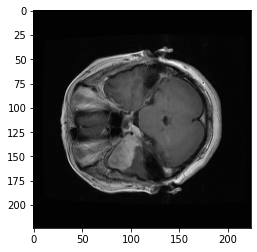

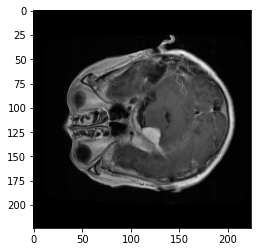

Epoch 1/100
79/79 [==============================] - 4s 57ms/step - loss: 4.4590 - accuracy: 0.5016 - lr: 0.1000
Epoch 2/100
79/79 [==============================] - 4s 57ms/step - loss: 1.0155 - accuracy: 0.6174 - lr: 0.0990
Epoch 3/100
79/79 [==============================] - 4s 57ms/step - loss: 1.0045 - accuracy: 0.6447 - lr: 0.0980
Epoch 4/100
79/79 [==============================] - 4s 57ms/step - loss: 0.7689 - accuracy: 0.6935 - lr: 0.0970
Epoch 5/100
79/79 [==============================] - 4s 57ms/step - loss: 0.6924 - accuracy: 0.7169 - lr: 0.0960
Epoch 6/100
79/79 [==============================] - 4s 57ms/step - loss: 1.4672 - accuracy: 0.6285 - lr: 0.0950
Epoch 7/100
79/79 [==============================] - 4s 56ms/step - loss: 0.9746 - accuracy: 0.6879 - lr: 0.0941
Epoch 8/100
79/79 [==============================] - 4s 57ms/step - loss: 0.9435 - accuracy: 0.7046 - lr: 0.0931
Epoch 9/100
79/79 [==============================] - 4s 57ms/step - loss: 0.7485 - accuracy: 0.7

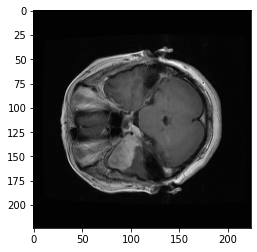

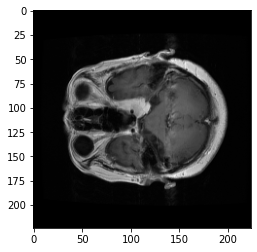

Epoch 1/100
75/75 [==============================] - 4s 59ms/step - loss: 3.2074 - accuracy: 0.4763 - lr: 0.1000
Epoch 2/100
75/75 [==============================] - 4s 56ms/step - loss: 0.9472 - accuracy: 0.6734 - lr: 0.0990
Epoch 3/100
75/75 [==============================] - 4s 56ms/step - loss: 0.7478 - accuracy: 0.7069 - lr: 0.0980
Epoch 4/100
75/75 [==============================] - 4s 56ms/step - loss: 1.0201 - accuracy: 0.6717 - lr: 0.0970
Epoch 5/100
75/75 [==============================] - 4s 56ms/step - loss: 0.6993 - accuracy: 0.7338 - lr: 0.0960
Epoch 6/100
75/75 [==============================] - 4s 57ms/step - loss: 0.9404 - accuracy: 0.6751 - lr: 0.0950
Epoch 7/100
75/75 [==============================] - 4s 56ms/step - loss: 1.1688 - accuracy: 0.6738 - lr: 0.0941
Epoch 8/100
75/75 [==============================] - 4s 57ms/step - loss: 0.7910 - accuracy: 0.7317 - lr: 0.0931
Epoch 9/100
75/75 [==============================] - 4s 56ms/step - loss: 0.7482 - accuracy: 0.7

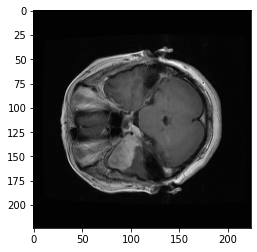

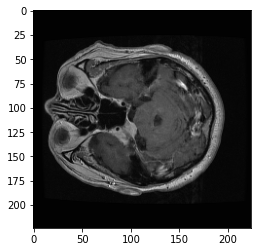

Epoch 1/100
78/78 [==============================] - 5s 58ms/step - loss: 4.6662 - accuracy: 0.5020 - lr: 0.1000
Epoch 2/100
78/78 [==============================] - 4s 57ms/step - loss: 1.1418 - accuracy: 0.6031 - lr: 0.0990
Epoch 3/100
78/78 [==============================] - 4s 56ms/step - loss: 1.0554 - accuracy: 0.6473 - lr: 0.0980
Epoch 4/100
78/78 [==============================] - 4s 57ms/step - loss: 1.0249 - accuracy: 0.6669 - lr: 0.0970
Epoch 5/100
78/78 [==============================] - 4s 56ms/step - loss: 1.1826 - accuracy: 0.6565 - lr: 0.0960
Epoch 6/100
78/78 [==============================] - 4s 57ms/step - loss: 1.0654 - accuracy: 0.6649 - lr: 0.0950
Epoch 7/100
78/78 [==============================] - 4s 56ms/step - loss: 0.8326 - accuracy: 0.7155 - lr: 0.0941
Epoch 8/100
78/78 [==============================] - 4s 56ms/step - loss: 1.1362 - accuracy: 0.6649 - lr: 0.0931
Epoch 9/100
78/78 [==============================] - 4s 57ms/step - loss: 0.7214 - accuracy: 0.7

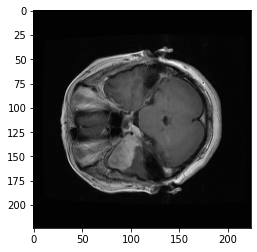

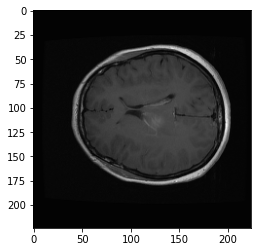

Epoch 1/100
77/77 [==============================] - 4s 58ms/step - loss: 3.5070 - accuracy: 0.4877 - lr: 0.1000
Epoch 2/100
77/77 [==============================] - 4s 56ms/step - loss: 1.3525 - accuracy: 0.5722 - lr: 0.0990
Epoch 3/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8658 - accuracy: 0.6687 - lr: 0.0980
Epoch 4/100
77/77 [==============================] - 4s 56ms/step - loss: 0.9875 - accuracy: 0.6527 - lr: 0.0970
Epoch 5/100
77/77 [==============================] - 4s 56ms/step - loss: 1.1907 - accuracy: 0.6482 - lr: 0.0960
Epoch 6/100
77/77 [==============================] - 4s 56ms/step - loss: 0.9627 - accuracy: 0.6843 - lr: 0.0950
Epoch 7/100
77/77 [==============================] - 4s 56ms/step - loss: 1.4890 - accuracy: 0.6264 - lr: 0.0941
Epoch 8/100
77/77 [==============================] - 4s 56ms/step - loss: 1.2819 - accuracy: 0.6502 - lr: 0.0931
Epoch 9/100
77/77 [==============================] - 4s 56ms/step - loss: 0.8715 - accuracy: 0.7

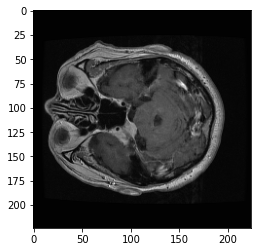

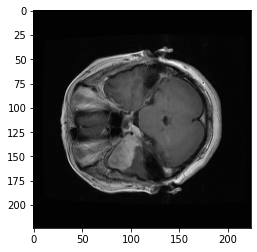

Epoch 1/100
76/76 [==============================] - 5s 59ms/step - loss: 5.7026 - accuracy: 0.4936 - lr: 0.1000
Epoch 2/100
76/76 [==============================] - 4s 57ms/step - loss: 1.0769 - accuracy: 0.6419 - lr: 0.0990
Epoch 3/100
76/76 [==============================] - 4s 57ms/step - loss: 0.8855 - accuracy: 0.6720 - lr: 0.0980
Epoch 4/100
76/76 [==============================] - 4s 57ms/step - loss: 0.8170 - accuracy: 0.6968 - lr: 0.0970
Epoch 5/100
76/76 [==============================] - 4s 57ms/step - loss: 0.9157 - accuracy: 0.6853 - lr: 0.0960
Epoch 6/100
76/76 [==============================] - 4s 57ms/step - loss: 0.9261 - accuracy: 0.6840 - lr: 0.0950
Epoch 7/100
76/76 [==============================] - 4s 57ms/step - loss: 0.7471 - accuracy: 0.7220 - lr: 0.0941
Epoch 8/100
76/76 [==============================] - 4s 57ms/step - loss: 0.6411 - accuracy: 0.7447 - lr: 0.0931
Epoch 9/100
76/76 [==============================] - 4s 57ms/step - loss: 0.9911 - accuracy: 0.6

In [8]:
ep=100
history=[]
predictions=[]
answers=[]
final_result=[]
times=[]
for index in range(1,6):
  gc.collect()
  #loading train and test folds and showing image

  trn,tst=get_trn_tst(index)
  plt.imshow(trn[0][0])
  plt.show()
  plt.imshow(tst[0][0])
  plt.show()

  #loading model
  mod=ResNet50(include_top=True, weights='imagenet')
  out_1=mod.layers[-2].output
  out=Dense(3,activation='softmax')(out_1)
  model=Model(inputs=mod.input,outputs=out)
  #training last layer
  
  def cng(idx):
    return 0.1-(0.1-0.001)*idx/ep
  lrs=LearningRateScheduler(cng)
  esr=EarlyStopping(patience=3,min_delta=0.1,restore_best_weights=True)
  for i in range(len(model.layers)):
    model.layers[i].trainable = False
  model.layers[-1].trainable=True
  model.compile(optimizer='adam', 
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])
  start=time()
  hist=model.fit(trn[0],to_categorical(trn[1]),batch_size=32,epochs=ep,callbacks=[lrs])
  stop=time()
  times.append(stop-start)
  history.append(hist.history)
  x_trn=model.predict(trn[0])
  x_tst=model.predict(tst[0])
  predictions.append(x_tst)
  answers.append(tst[1])
  result=accuracy_score(tst[1],np.argmax(x_tst,1))
  final_result.append(result)
  del([trn,tst])
  gc.collect()

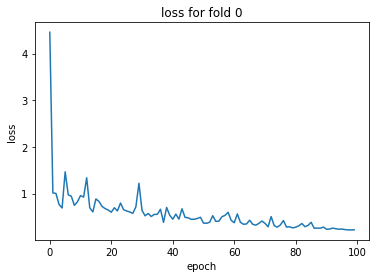

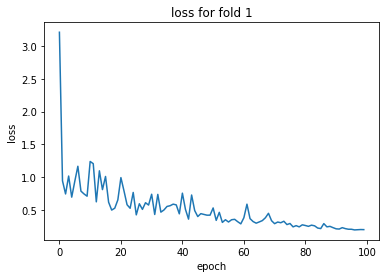

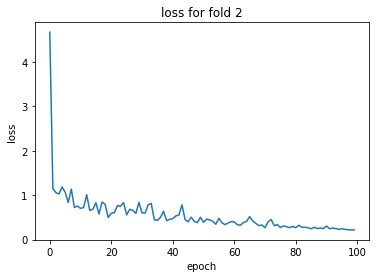

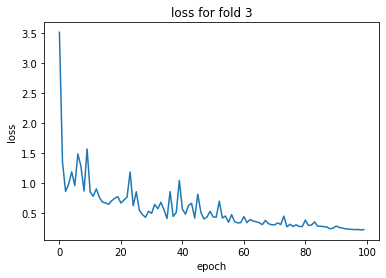

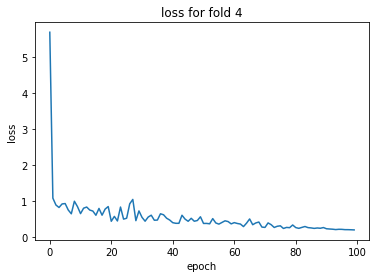

In [13]:
from matplotlib import pyplot as plt
for i in range(5):
    plt.plot(history[i]['loss'])
    plt.title('loss for fold '+str(i))
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

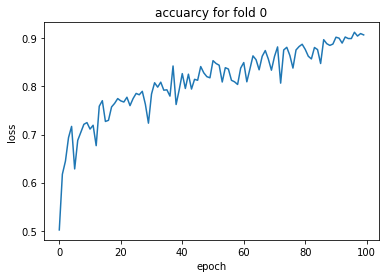

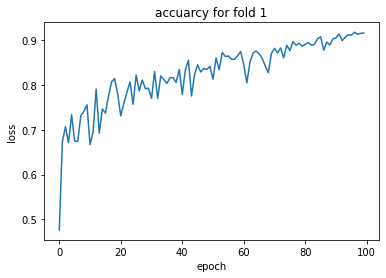

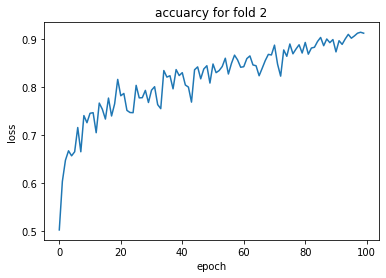

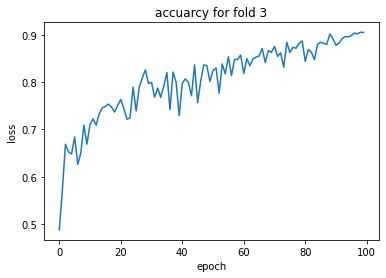

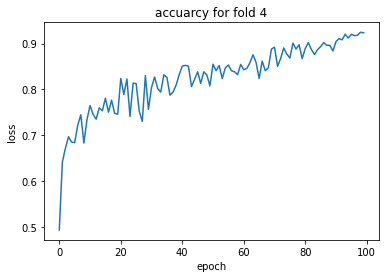

In [14]:
for i in range(5):
    plt.plot(history[i]['accuracy'])
    plt.title('accuarcy for fold '+str(i))
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

In [9]:
np.mean(final_result)

0.796389340008441

In [10]:
np.mean(times)

445.0951903343201

In [11]:
from sklearn.metrics import confusion_matrix
for i in range(5):
  cnf=confusion_matrix(answers[i],np.argmax(predictions[i],1))
  print()
  print(cnf)


[[ 73  39   0]
 [ 21 223   1]
 [ 17  18 150]]

[[ 83  64  20]
 [ 43 282  13]
 [ 13   8 153]]

[[ 81  52   6]
 [ 40 181  10]
 [  7   4 191]]

[[ 71  48   5]
 [ 27 292   6]
 [ 11   7 161]]

[[ 85  57  24]
 [ 57 229   1]
 [  2   7 181]]


In [12]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________